In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import math
import time

from data_functions import *
from subset_functions import *
from model_functions import *
from search_functions import *
from analysis_functions import *

import matplotlib.pyplot as plt
#% matplotlib inline

dir_results = '../results'

# Real-valued data example

In [10]:
obs_model ='normal'; data_type='cont'; f_base = 'OLS_poly1'; z_eff = 5.0

# Binary data example

In [4]:
obs_model = 'bernoulli'; data_type='binary'; f_base = 'Logit_poly1'; z_eff = 4.0

#### Run this code

Starting RDSS searching for k = 100 ...
Getting neighbors...
Fitting model...
basic_fit OLS_poly1 True
fitted model!
Computing residuals, r_i = \epsilon_i ...
Precomputing variance, sigma_i ...


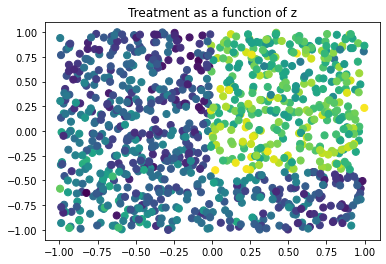

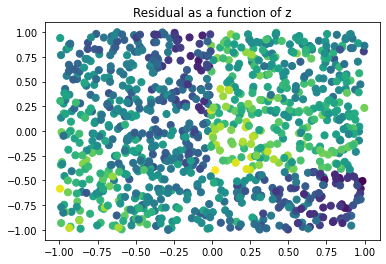

Starting search over neighs...


/Users/wh/Desktop/CMU/RD_search/src/subset_functions.py:120: RuntimeWarning: invalid value encountered in true_divide
  angle = np.arccos(np.dot(dist_center, dist_pivot[ii, :]) / \
/Users/wh/Desktop/CMU/RD_search/src/subset_functions.py:128: RuntimeWarning: invalid value encountered in greater_equal
  neighs[:, ii] = (1 <= quadrant) | (quadrant >= 2)
/Users/wh/Desktop/CMU/RD_search/src/subset_functions.py:120: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(dist_center, dist_pivot[ii, :]) / \
/Users/wh/Documents/python3_venv/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/wh/Documents/python3_venv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Finished RDSS search in 17.122129917144775 seconds


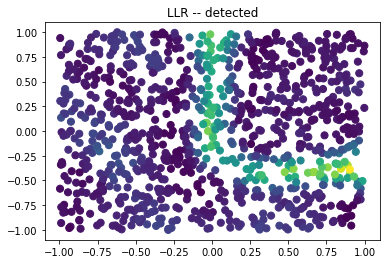

TODO: plot beta0 and beta1 for multiple dim
Timing: 17.312788009643555


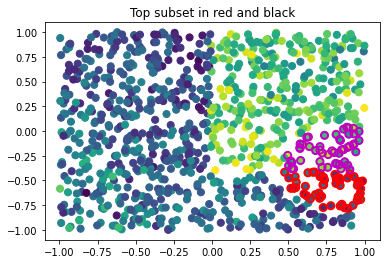

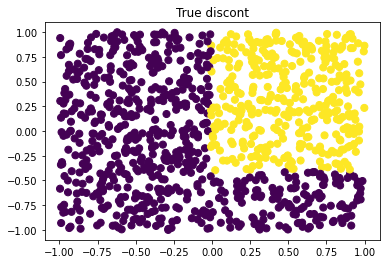

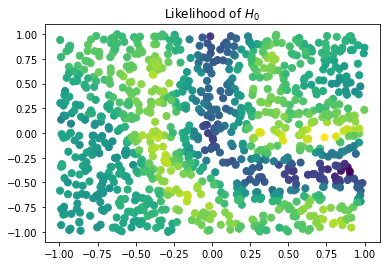

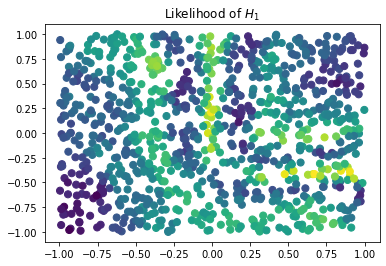

"\n# Sig stats of randomization testing\nz_eff, acc, T_eff = RDSS_result_stats_sig(llrs, llr_sig, beta_0_n, beta_1_n, subsets_best, neighs, discont, x, y, T_fx)\nprint 'z effect est:', z_eff\nprint 'acc est:     ', acc\nprint 'T effect est:', T_eff\n"

In [11]:
np.random.seed(50)
poly_xT=1
RPD=0
discont_type='square' #'linear' # 'poly2' #
n = 1000
x,y,z,T, D_z, z_eff, beta_y_T, discont = data_synthetic(data_type=data_type, RPD=RPD, n=n, px=2, pz=2, z_eff=z_eff,  poly_xT=poly_xT, discont_type=discont_type, verbose=False)

#  search for discontinuity
f_yT = 'OLS_poly1'
k= 100
post_shrink = False

start = time.time()
llrs, neighs, subsets_best, beta_0_n, beta_1_n, T_fx, llrs_n, llrs_a, centers_n, angles_best, subset_imax = \
RDSS_residual(obs_model, T, x, z, f_base=f_base, all_points=False, k=k, RPD=RPD, post_shrink=post_shrink, verbose=True, plotting=True)
end = time.time()
print ('Timing:', end - start)

# Plot the best
max_arg = np.nanargmax(llrs)
plot_neigh(x, z, out=T, out_name='Top subset in red and black', neigh=[subset_neigh(neighs[:,max_arg], subsets_best[max_arg]),subset_neigh(neighs[:,max_arg], ~subsets_best[max_arg])])
plot_neigh(x, z, out=discont, out_name='True discont')
plot_neigh(x, z, out=llrs_n, out_name='Likelihood of $H_0$')
plot_neigh(x, z, out=llrs_a, out_name='Likelihood of $H_1$')

'''
print ()'Randomization testing')
# Rand testing
k_samples = k
iters_rand = 5 # 100 # 
alpha = 0.05
llr_sig, llr_max_samples = rand_testing(T_fx, k_samples, iters_rand, alpha, T, y, x, z, f_base, subset_type='vector', all_points=False, k=k)
# plot centers of significant LLRs
plot_neigh(x, z, llrs>llr_sig, 'LLR -- significant at alpha '+str(alpha))


idxs = np.flip(np.argsort(llrs)[np.where(np.sort(llrs) > llr_sig)], 0)

T_effect(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='all', agg_type='avg', verbose=True)
T_effect(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='all', agg_type='wavg', verbose=True)
T_effect(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='subsets', agg_type='avg', verbose=True)
T_effect(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='subsets', agg_type='wavg', verbose=True)

T_effect_multi(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='all', agg_type='avg', verbose=True)
T_effect_multi(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='all', agg_type='wavg', verbose=True)
T_effect_multi(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='subsets', agg_type='avg', verbose=True)
T_effect_multi(idxs, neighs, x, y, T_fx, beta_0_n, beta_1_n, subsets_best, llrs, f_base='RLM_poly1', scope='subsets', agg_type='wavg', verbose=True)

z_effect(idxs, beta_0_n, beta_1_n, llrs, agg_type='avg', verbose=True)
z_effect(idxs, beta_0_n, beta_1_n, llrs, agg_type='wavg', verbose=True)

acc_subsets(idxs, neighs, discont, subsets_best, beta_0_n, beta_1_n, llrs, agg_type='avg', verbose=True)
acc_subsets(idxs, neighs, discont, subsets_best, beta_0_n, beta_1_n, llrs, agg_type='wavg', verbose=True)
#'''

'''
# Sig stats of randomization testing
z_eff, acc, T_eff = RDSS_result_stats_sig(llrs, llr_sig, beta_0_n, beta_1_n, subsets_best, neighs, discont, x, y, T_fx)
print 'z effect est:', z_eff
print 'acc est:     ', acc
print 'T effect est:', T_eff
'''
